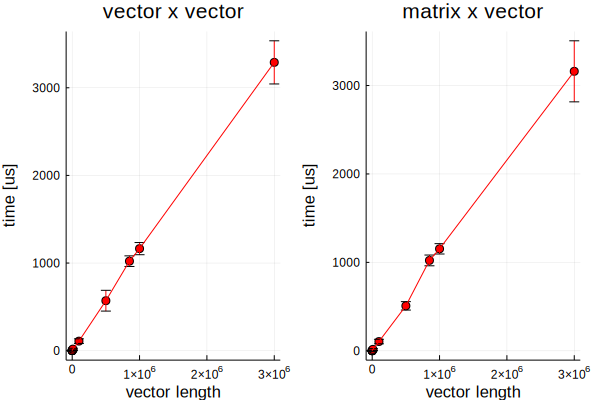

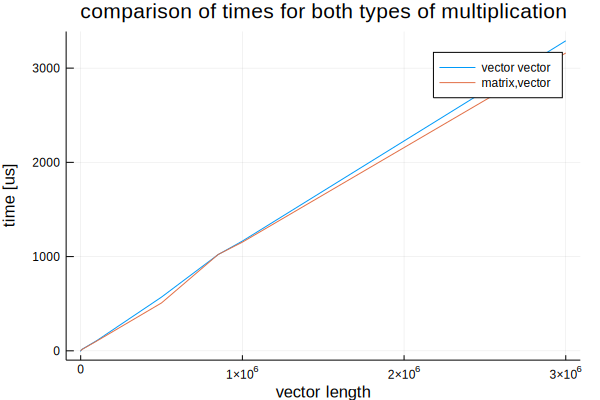

In [4]:
using CSV
using Plots
using Statistics

input="results.csv"
data=CSV.read(input, delim=";")


vv_data=[]
mv_data=[]

number_of_vectors=size(data,1)/10
vector_sizes = []

i=1 ; j=10
while i <= size(data,1)
    if i % 10 == 1
        push!(vector_sizes,data[i,1])
    end
    push!(vv_data,data[i:j,2])
    push!(mv_data,data[i:j,3])
    i+=10 ;j+=10
end 

vv_means =map(x->mean(x),vv_data)

vv_std = map(x->sqrt(var(x)),vv_data)
# vv_std = sqrt(var(data[2]))

# print(vv_std)

mv_means =map(x->mean(x),mv_data)
mv_std = map(x->sqrt(var(x)),mv_data)

# show(vector_sizes)
vv_scat=scatter(vector_sizes,[vv_means], colour=[:red], yerr=vv_std,title="vector x vector ")
plot!(vector_sizes,[vv_means],colour=[:red],layout=1,xlabel ="vector length", ylabel="time [us]")


mv_scat= scatter(vector_sizes,[mv_means], colour=[:red], yerr=mv_std,title="matrix x vector")
plot!(vector_sizes,[mv_means],colour=[:red],layout=1,xlabel ="vector length", ylabel="time [us]")



display(plot(vv_scat,mv_scat, layout=(2),legend=false))

plot(vector_sizes,[vv_means,mv_means],title="comparison of times for both types of multiplication",xlabel="vector length",ylabel="time [us]",label=["vector vector","matrix,vector"])


